# K-Means

### 1. Data Import

In [1]:
# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Get Data
df_raw_data = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')

#Size, Number of Columns
print(df_raw_data.shape)
print(df_raw_data.dtypes)

(11302, 30)
Unnamed: 0                 int64
web-scraper-order         object
web-scraper-start-url     object
price_raw                 object
qubic_meter_raw           object
rooms_raw                 object
full_address              object
description               object
type                      object
rooms                    float64
area                       int64
price                      int64
PLZ                        int64
Street                    object
description_len          float64
luxurious                float64
furnished                float64
balcony                  float64
garden                   float64
quiet                    float64
central                  float64
price_per_m2             float64
price_cat                 object
area_cat                  object
Ortschaftsname            object
BfS_Id                     int64
Kantonskürzel             object
Kantonssteuerfuss        float64
Gemeindesteuerfuss       float64
steuersatz_kombiniert    float6

### 2. Check optimal number of Clusters for K-Means

In [15]:
Y = df_raw_data['price_per_m2'].values.reshape(1, -1)



print(Y)

[[9090.91 6250.   8510.64 ... 9251.7  6220.47 3431.37]]


In [12]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

Y = df_raw_data['price_per_m2'].values.reshape(1, -1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Y)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()



C:\Users\maxwo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: n_samples=1 should be >= n_clusters=2.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


  
df = df_raw_data.loc[['Kantonskürzel'],['price_per_m2']]
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

KeyError: "None of [Index(['Kantonskürzel'], dtype='object')] are in the [index]"

### 3. Create Pivot Table of mean price_per_m2 per Kanton

##### For Price_per_m2

In [98]:
table = pd.pivot_table(df_raw_data, 
                       values='price_per_m2',
                       columns=['Kantonskürzel'], 
                       aggfunc=np.mean)
print(table)



Kantonskürzel           AG           AI           AR           BE  \
price_per_m2   7474.842328  8258.487143  6279.188387  7287.571959   

Kantonskürzel           BL            BS           FR            GE  \
price_per_m2   8735.117752  11893.986988  6418.688121  14692.810912   

Kantonskürzel           GL            GR  ...        SH           SO  \
price_per_m2   5104.480714  11043.322323  ...  6119.461  5858.977946   

Kantonskürzel            SZ           TG           TI            UR  \
price_per_m2   11183.309855  7071.784702  7056.931364  10706.400488   

Kantonskürzel           VD           VS          ZG            ZH  
price_per_m2   10069.50564  7386.015361  15235.4275  10603.563867  

[1 rows x 26 columns]


##### For Steuersatz Kombiniert

In [71]:
table = pd.pivot_table(df_raw_data, 
                       values='steuersatz_kombiniert',
                       columns=['Kantonskürzel'], 
                       aggfunc=np.mean)
print(table)



Kantonskürzel                  AG          AI          AR          BE  \
steuersatz_kombiniert  216.437313  165.714286  717.096774  464.047074   

Kantonskürzel                  BL         BS          FR          GE  \
steuersatz_kombiniert  156.029866  99.277108  174.420518  190.098035   

Kantonskürzel                  GL          GR  ...       SH          SO  \
steuersatz_kombiniert  118.521429  189.814961  ...  191.875  221.392857   

Kantonskürzel                  SZ         TG          TI          UR  \
steuersatz_kombiniert  286.942029  256.13245  179.387871  201.512195   

Kantonskürzel                  VD          VS      ZG          ZH  
steuersatz_kombiniert  222.769676  220.432507  137.45  205.625578  

[1 rows x 26 columns]


### 4. Create grouped boxplot (groups=Kantonskürzel, values=price_per_m2)

##### 4.1 Boxplot for price_per_m2 without Outliers

C:\Users\maxwo\AppData\Local\Temp\ipykernel_20376\3127830947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')


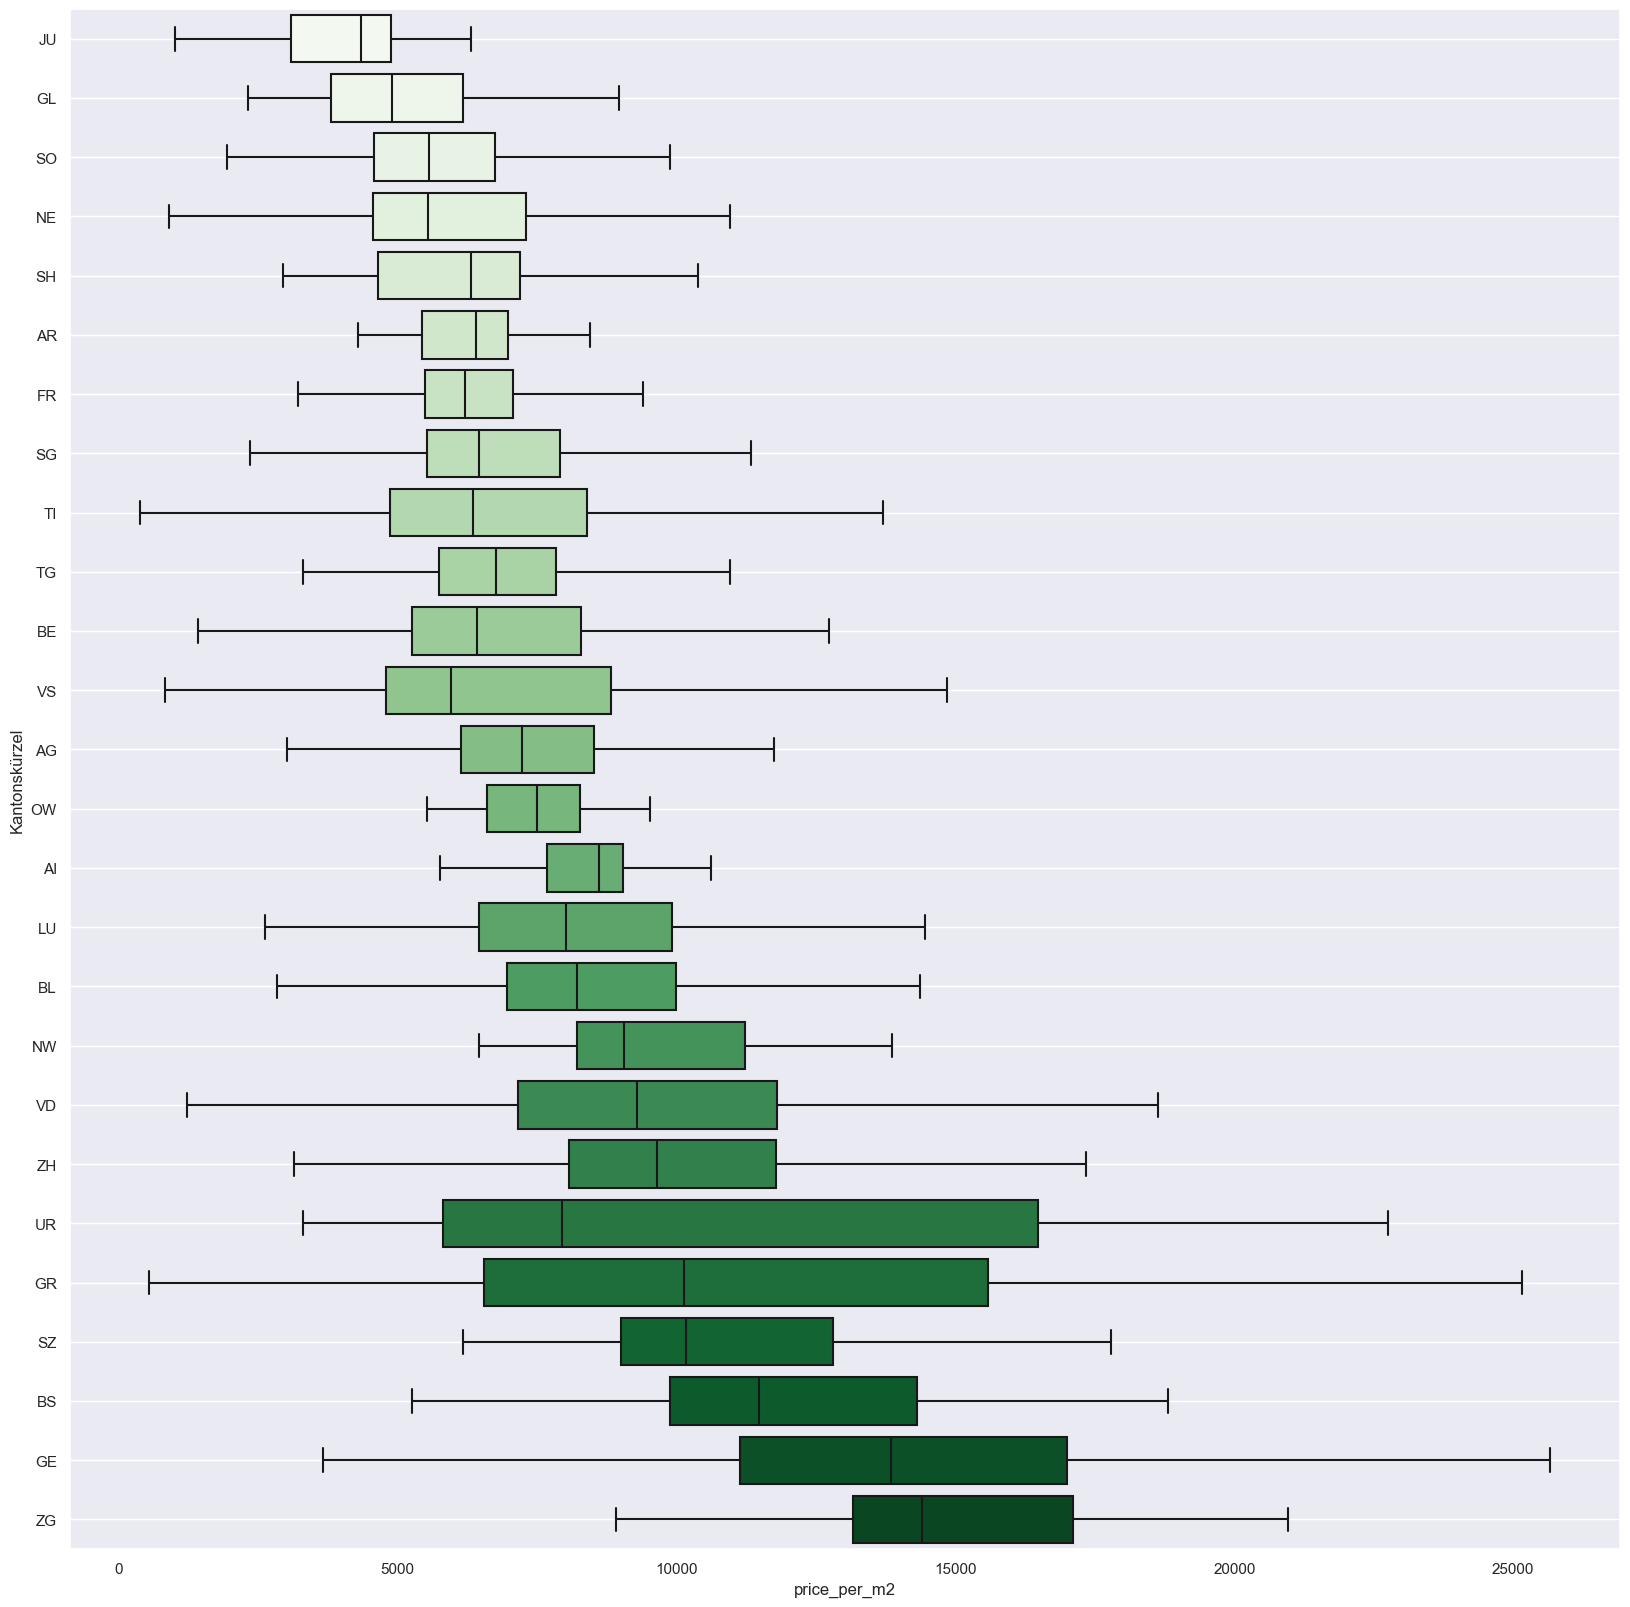

In [95]:
df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_sorted = df_sorted.sort_values(['price_per_m2']).index


# Plot boxplot with groups
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Greens",
                 data=df_raw_data,
                 order=df_sorted,
                 orient='h',showfliers=False)
plt.grid()
plt.show()

##### 4.2 Boxplot for price_per_m2 with Outliers

C:\Users\maxwo\AppData\Local\Temp\ipykernel_20376\1506021586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')


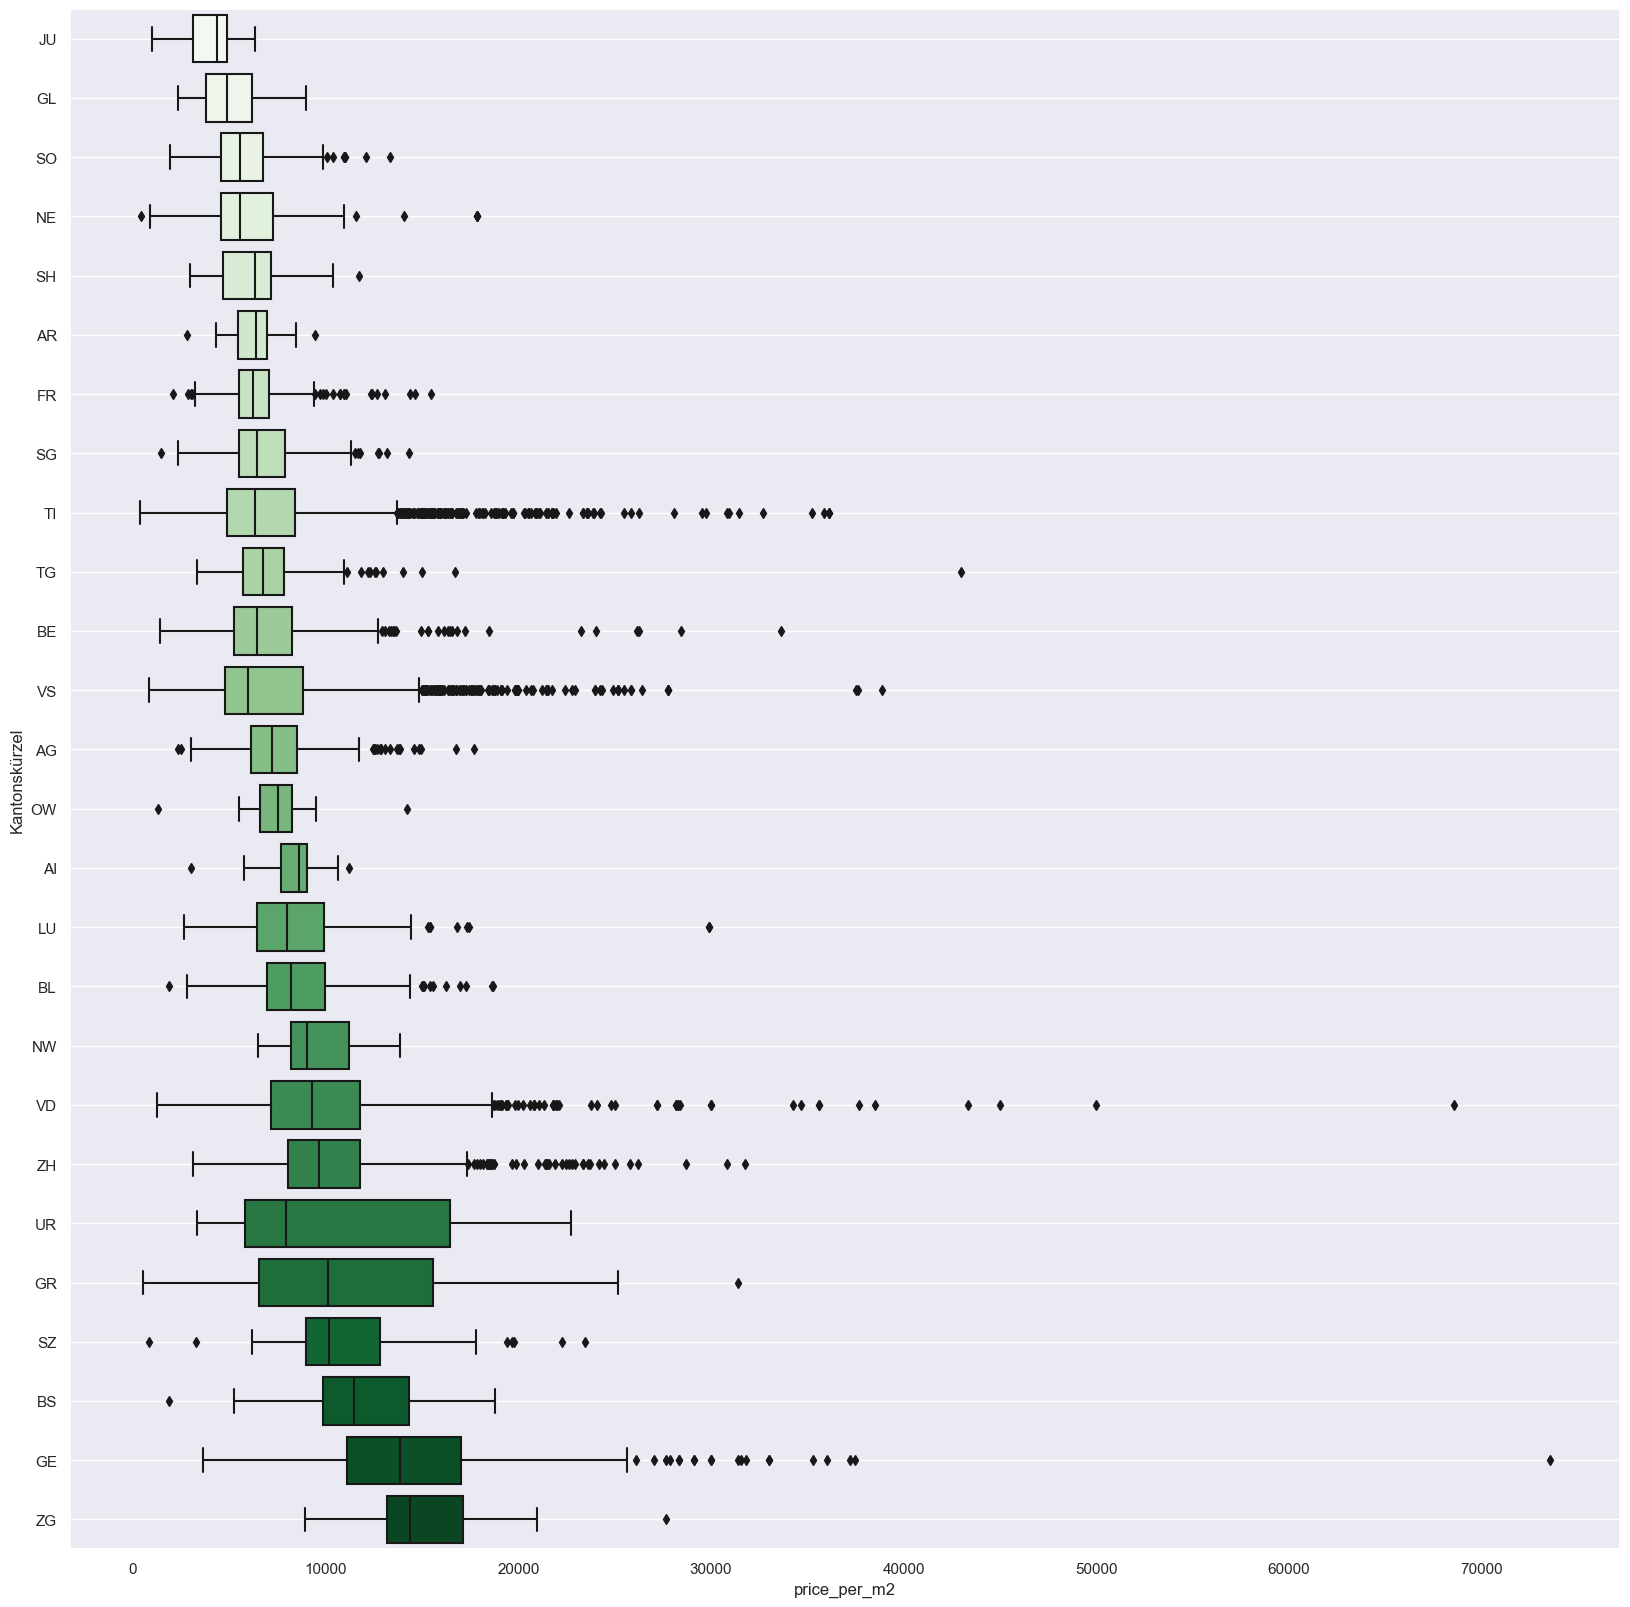

In [73]:
df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_sorted = df_sorted.sort_values(['price_per_m2']).index


# Plot boxplot with groups
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Greens",
                 data=df_raw_data,
                 order=df_sorted,
                 orient='h')
plt.grid()
plt.show()

### 5. Anova

##### 5.1 Preparation

In [105]:
df_aggregatedMeans = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_largest = df_aggregatedMeans.nlargest(3,['price_per_m2'])
df_smallest = df_aggregatedMeans.nsmallest(3,['price_per_m2'])

print("List of the highest priced municipalities: ",df_largest.index.tolist())
print("List of the lowest priced municipalities: ",df_smallest.index.tolist())



List of the highest priced municipalities:  ['ZG', 'GE', 'BS']
List of the lowest priced municipalities:  ['JU', 'GL', 'SO']


C:\Users\maxwo\AppData\Local\Temp\ipykernel_20376\2957053102.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aggregatedMeans = df_raw_data.groupby('Kantonskürzel').agg('mean')


#### 5.1 Anova for Kantonskürzel & price_per_m2

In [106]:
# Create subsets (groups)
zg = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'ZG']
ge = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'GE']
bs = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'BS']
ju = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'JU']
gl = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'GL']
so = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'SO']






# Create ANOVA
fvalue, pvalue = stats.f_oneway(zg['price'],
                                ge['price'],
                                bs['price'],
                                ju['price'],
                                gl['price'],
                                so['price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(300))



F-value: 60.701 p-value 3.337807495581757e-56
